# Introduction to Probability Distributions

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

# Binomial Distribution

In [2]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

In [3]:
data_binom.size

10000

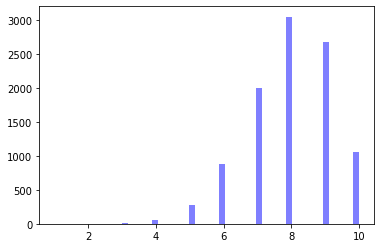

In [4]:
n, bins, patches = plt.hist(data_binom, 50, facecolor='blue', alpha=0.5)
plt.show()

In [5]:
import numpy as np
from scipy.stats import binom
import math
prob = binom.cdf(data_binom, n=10, p=0.8)

A pair of dice is thrown 20 times. Find the probability of getting a double 6 at least 3 times.

In [6]:
# Double 6: 1 time:
# (n choose k) * p^k * (1-p)^(n-k)
# (20 choose 1) * ((1/36)^1) * ((35/36)^19)
float(math.factorial(20)) / (math.factorial(19) * math.factorial(1)) * ((1.0/36.0)**1) * ((35.0/36.0)**19)

0.3252915807703044

In [7]:
n = 20
p = 1.0/36
binom.pmf(1, n, p)

0.32529158077030434

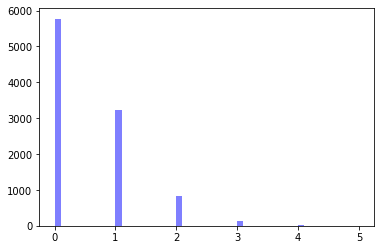

In [8]:
data_binom = binom.rvs(n=n,p=p,size=10000)
nn, bins, patches = plt.hist(data_binom, 50, facecolor='blue', alpha=0.5)
plt.show()

In [9]:
[binom.pmf(0, n, p), binom.pmf(1, n, p), binom.pmf(2, n, p)]

[0.5692602663480327, 0.32529158077030434, 0.08829342906622555]

A pair of dice is thrown 20 times. Find the probability of getting a double 6 at least 3 times.

In [10]:
1.0 - (binom.pmf(0, n, p) + binom.pmf(1, n, p) + binom.pmf(2, n, p))

0.017154723815437367

# Gaussian (Normal) Distribution & Hypothesis Testing

Imagine a trading platform receives on average 300 trades per second, that follow a Gaussian distribution, with a standard deviation of 30 trades per second. If there is a technical error with one of your servers, you might see fewer trades per second. At which point might you get worried about your servers, at a 95% confidence level?

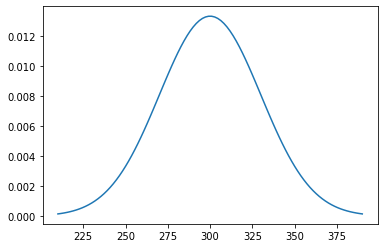

In [11]:
import scipy.stats as stats

mu = 300
variance = 30**2
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Null Hypothesis: M = 300

Alternative Hypothesis: M < 300

A One Tail Test, at 5% critical value (95% confidence level)

In [12]:
import scipy
scipy.stats.norm.ppf(.05)

-1.6448536269514729

In [13]:
scipy.stats.norm.ppf(.025)

-1.9599639845400545

In [14]:
scipy.stats.norm.ppf(.05, 300, 30)

250.65439119145583

In [15]:
scipy.stats.norm.ppf(.01, 300, 30)

230.2095637787748

If you observe 228 Trades per Second, you can reject the Null Hypothesis at both the 95% and 99% confidence levels, and alert your IT manager to the likely server problem

# Chi-Square Distribution & Goodness of Fit

A chemical company produces five chemicals, as follows: 1300 bottles a day of chemical A, 800 of chemical B, 1100 of chemical C, 500 of D and 1400 of chemmical E. As an analyst at an Investment Bank, you request a random sample of your products to be sent to an independent third party company for analysis, as part of an audit. The third party company receives 101 samples of product A, 30 of B, 69 of C, 17 of D and 83 of E. Using a 0.1% significance level, test whether the samples appear to be providing an unbiased representation of the products of the company.

Null Hypothesis: all products are equally likely to be represented in the sample

Alternative Hypothesis: The sample is in some way biased (a two-way test)

In [16]:
Observed = [101, 30, 69, 17, 83]
Expected = [1300, 800, 1100, 500, 1400]
Expected = [x * np.sum(Observed) / np.sum(Expected) for x in Expected]
Expected

[76.47058823529412,
 47.05882352941177,
 64.70588235294117,
 29.41176470588235,
 82.3529411764706]

In [17]:
import pandas as pd
Data = pd.DataFrame({'Expected':Expected, 'Observed':Observed})
Data

,Expected,Observed
0,76.470588,101
1,47.058824,30
2,64.705882,69
3,29.411765,17
4,82.352941,83


Define: $$X^2 = \sum_{i=1}^m\frac{(O_i - E_i)^2}{E_i}$$ where Oi and Ei are observed and expected frequencies and m is the number of categories being compared. X^2 is approximately an observation from a chi-squared distribution with m-1 degrees of freedom: $$X^2 \sim \chi^2_{m-1}$$

In [18]:
X2 = np.sum((Data['Observed'] - Data['Expected'])**2 / Data['Expected'])
X2

19.579926073926078

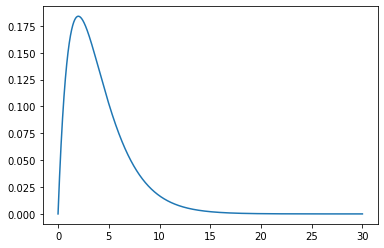

In [19]:
from scipy.stats import chi2
X = np.arange(0, 30, 0.001)
plt.plot(X, chi2.pdf(X, df=4))

In [20]:
# Critical Value (at 0.1% significance level):
scipy.stats.chi2.ppf((1.0-0.001), 4)

18.46682695290317

Reject the Null Hypothesis!

# The F Distribution & A Ratio of Variances

An experiment was conducted to investigate the effects of two alternative fertilizers on the growth of spinach plants. The plants were grown in controlled conditions, with 12 randomly selected plants being given fertilizer A, and a further 12 being given fertilizer B. Before the end of the experiment, some plants were attacked by a fungus, and they were removed from the experiment. The final results are summarized below:

In [21]:
Data = pd.DataFrame({'Fertilizer':['A','B'], 'Sample Size':[11,10], 'sum X':[1098, 1083], 'sum X^2':[175644, 145350], 'Sigma^2':[6604.36, 3117.90]})
Data

,Fertilizer,Sample Size,sum X,sum X^2,Sigma^2
0,A,11,1098,175644,6604.36
1,B,10,1083,145350,3117.90


Null Hypothesis: $$\sigma_x^2 = \sigma_y^2$$

Alternative Hypothesis: $$\sigma_x^2 \neq \sigma_y^2$$

A two tailed test

Note: $$ \frac{n_x-1}{\sigma^2} S^2_x \sim \chi^2_{n_x-1} $$

$$ \frac{n_y-1}{\sigma^2} S^2_y \sim \chi^2_{n_y-1} $$

From the definition of the F-Distribution, taking the scaled ratio of random variables with chi^2 distributions, we get:

 $$ \frac{\frac{n_x-1}{\sigma^2} S^2_x}{n_x-1} : \frac{\frac{n_y-1}{\sigma^2} S^2_y}{n_y-1} \sim F_{n_x-1, n_y-1}$$

Which simplifies to give: $$\frac{S^2_x}{S^2_y} \sim F_{n_x-1, n_Y-1}$$

In [ ]:
6604.36 / 3117.90

In [ ]:
# Critical Values
scipy.stats.f.ppf(q=1-0.025, dfn=10, dfd=9)

Accept the Null Hypothesis: Not enough evidence to reject the null. The two fertilizer appear to result in similar varainces.

Under the null, the pooled estimate of the common variance is therefore: $$s^2 = \frac{(n_x-1)s^2_x + (n_y-1)s^2_y}{n_x+n_y-2}$$

In [ ]:
s2 = 1.0/19.0 * ((175644.0 - 1.0/11.0*(1098.0**2)) + (145350.0 - 1.0/10.0*(1083.0**2)))
s2

The upper and lower 0.5% points of the chi^2(19) distribution are:

In [ ]:
[scipy.stats.chi2.ppf((0.005), 19), scipy.stats.chi2.ppf((1.0-0.005), 19)]

And therefore the symmetric 99% confidence interval for the common variance is:

In [ ]:
[((19 * 4952.88) / 38.58), (19 * 4952.88) / 6.844]

Approx: (2440, 13750), which includes both 6604.36 and 3117.90 observed above